# CV exercise 4 – YOLO

In this exercise we will be running a pretrained instance of the YOLO object detection algorithm using OpenCV.

**Questions:**

1. Make sure that you have the following files in the same directory as this notebook:
  * `yolov3.weights` – pretrained weights for the YOLO model. **Note:** This file is large (237 MB). If you are working in Google Colab it can be faster to download these weights directly from the notebook by uncommenting and running the code cell below.
  * `yolov3.cfg` – configuration file for YOLO model
  * `coco.names` – list of names of object classes (from COCO dataset)
  * `christmas.jpg` – image
2. Load the image into a variable `img` using OpenCV, and display the image. Also save variables `img_h, img_w = img.shape[:2]` containing the image's height and width; we will need them soon.
3. Read the class names from `coco.names` into a variable `coco_classes`. Check that this is a list of strings of length 80 and print out the first 5 names of classes in the list.
4. Generate random colors for each class as follows: Using `np.random.randint(...)`, create an array of shape `(80, 3)`, where each entry in the array is a random number between 0 and 255. Each row of the array will be the RGB representation of a random color.
5. Run the code cell below (CODE FOR QUESTION 5) to load the pretrained YOLO model. Note: Unfortunately, the most commonly used pretrained YOLO model was implemented in the Darknet deep learning framework, and not our friend TensorFlow. Sorry!
6. Using `net.getLayerNames()`, print out the first 10 layer names in the model. How many layers are in the model total?
7. The model expects input in "blob" format. Run the code below (CODE FOR QUESTION 7) to make this conversion. What type of Python object is the variable `blob`? How does its shape compare to `img.shape`? Note: The code assumes that `img` is in BGR format, so make sure you did not convert it to RGB in question 2.
8. Using `net.getUnconnectedOutLayers()` or `net.getUnconnectedOutLayersNames()`, get the names of the output layers of the model and save them as a list in a variable `output_names`. `output_names` should be a list of three strings. Print them out.
9. Run the code below (CODE FOR QUESTION 9) to run YOLO prediction on your image. Note that the three outputs correspond to small-sized, medium-sized, and large-sized detected objects.
10. Using `np.vstack(...)`, combine all the detected objects together into a single NumPy array `all_outputs`. This should be an array with 85 columns. How many rows does it have? Why do you think there are so many rows in the output?
11. There are 85 columns in `all_outputs` because the first four columns are bounding box coordinates, the fifth column gives confidence scores and the rest are probabilities for the COCO object classes. Create a NumPy array `objs` that contains only objects with confidence score at least 0.1. It should have shape `(?, 85)`. How many rows does it contain?
12. We will now prepare the data for displaying the results of our detection. Create the following lists and fill them with data from `objs`:
  * `boxes`: Should be a Python list where each element is itself a list or tuple of length 4: `(x_value, y_value, width, height)`. You can calculate these with function `output_coordinates_to_box_coordinates(...)` below (CODE FOR QUESTION 12). Its inputs are the values in the first four columns of `objs`.
  * `confidences`: Should be a Python list containing confidence scores of the detected objects (fifth column of `objs`. Note: You must convert the scores to Python floats using `float(...)`
  * `class_names`: Should be a Python list containing the COCO class names for the detected objects. Use `np.argmax(...)` to select the index of the object with maximum predicted probability, and `coco_classes` to find the names of each class.
  * `colors`: Should be a Python list where each element is itself a list or tuple of length 3: `((red_value), (blue_value), (green_value))`. Use `int(...)` to make sure that each value is a Python integer.
13. Run the code below (CODE FOR QUESTION 13) to perform non-maximum suppression on the detected objects. Explain briefly in words what this does.
14. Run the code below (CODE FOR QUESTION 14) to create a new image `image_yolo` that displays objects and their bounding boxes.
15. Save your image to a file `yolo.png`, and include this image in your answer submission.
16. Try running YOLO on another image of your choice, and share the results in the class Slack channel.

In [1]:
# FOR QUESTION 1 IF WORKING IN GOOGLE COLAB
! wget https://pjreddie.com/media/files/yolov3.weights

--2024-03-25 15:18:23--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.2’

yolov3.weights.2    100%[===================>] 236.52M  29.6MB/s    in 8.6s    

2024-03-25 15:18:32 (27.4 MB/s) - ‘yolov3.weights.2’ saved [248007048/248007048]



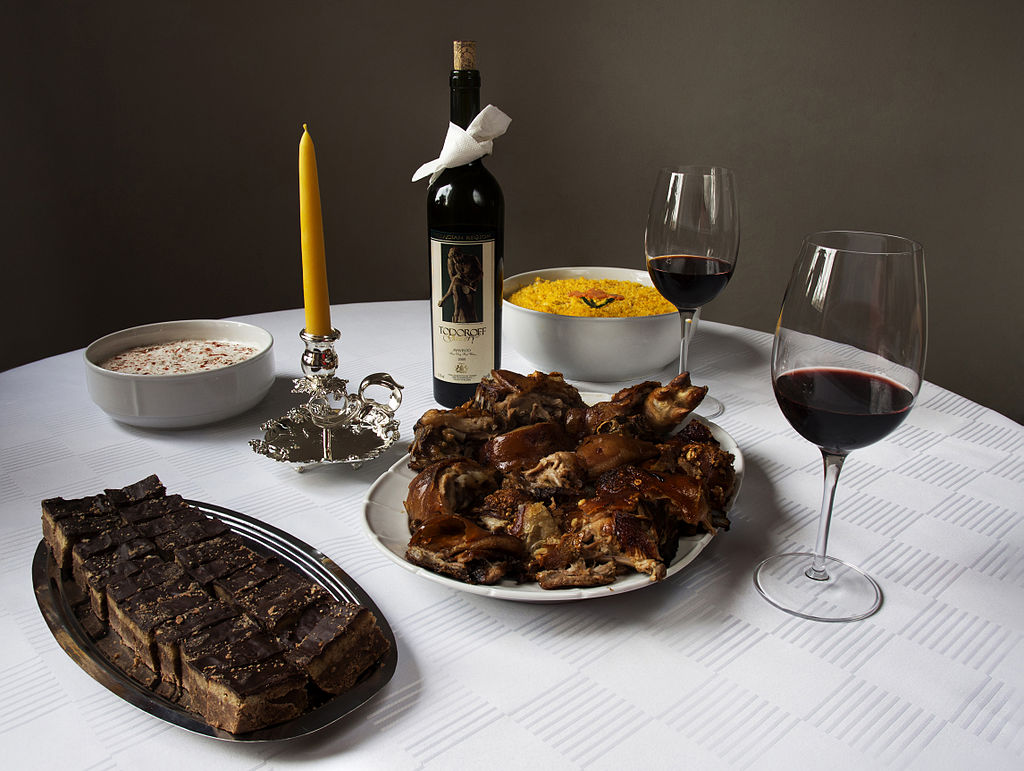

In [2]:
#2.
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img = cv2.imread('christmas.jpg')
cv2_imshow(img)

In [3]:
img_h, img_w = img.shape[:2]

In [4]:
#3.
with open('coco.names', 'r') as file:
    coco_classes = [line.strip() for line in file.readlines()]


In [5]:
len(coco_classes)

80

In [6]:
type(coco_classes[0])

str

In [7]:
print(coco_classes[:5])

['person', 'bicycle', 'car', 'motorcycle', 'airplane']


In [8]:
#4.
import numpy as np
random_colors = np.random.randint(0, 256, size=(80, 3))

In [9]:
# CODE FOR QUESTION 5
net = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights.1')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)

In [10]:
#6.
net.getLayerNames()[:10]

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3')

In [11]:
len(net.getLayerNames())

254

There is 254 layers in the model.

In [12]:
# CODE FOR QUESTION 7
blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), swapRB=True, crop=False)

In [13]:
type(blob)

numpy.ndarray

blob is a np array.

In [14]:
blob.shape, img.shape

((1, 3, 416, 416), (771, 1024, 3))

The shape of blob is (1,3,416,416) whereas the shape of img is (771,1024,3).

In [15]:
#8.
output_names = list(net.getUnconnectedOutLayersNames())
output_names

['yolo_82', 'yolo_94', 'yolo_106']

The name of the output layers are 'yolo_82', 'yolo_94', 'yolo_106'.

In [16]:
# CODE FOR QUESTION 9
net.setInput(blob)
%time large, medium, small = net.forward(output_names)

CPU times: user 4.21 s, sys: 1.6 s, total: 5.8 s
Wall time: 8.89 s


In [17]:
#10.
all_outputs = np.vstack((large,medium,small))

In [18]:
all_outputs.shape

(10647, 85)

We have 10,647 rows. We have so much rows because our input image is very big.

In [19]:
all_outputs[all_outputs[:,4] >= 0.1].shape

(32, 85)

In [20]:
#11.
index_highconf = np.where(all_outputs[:,4] >0.1)

In [21]:
objs = all_outputs[index_highconf]

In [22]:
objs.shape

(32, 85)

It has 32 rows.

In [23]:
# CODE FOR QUESTION 12
def output_coordinates_to_box_coordinates(cx, cy, w, h):
  abs_x = int((cx - w/2) * img_w)
  abs_y = int((cy - h/2) * img_h)
  abs_w = int(w * img_w)
  abs_h = int(h * img_h)
  return abs_x, abs_y, abs_w, abs_h

In [24]:
boxes = []
for index in range(objs.shape[0]):
    boxes.append(output_coordinates_to_box_coordinates(objs[index][0],objs[index][1],objs[index][2],objs[index][3]))


In [25]:
confidences = list(objs[:,4].astype(float))


In [26]:
indexes_object = np.argmax(objs[:,5:], axis = 1)

In [27]:
class_names = [coco_classes[det_obj] for det_obj in indexes_object]

In [28]:
random_colors[30]

array([127,  39,  75])

In [29]:
colors = [tuple(map(int,random_colors[det_obj])) for det_obj in indexes_object]

In [30]:
# CODE FOR QUESTION 13
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

It gives indices of the bounding boxes with high confidence score and low overlap with other bounding boxes.

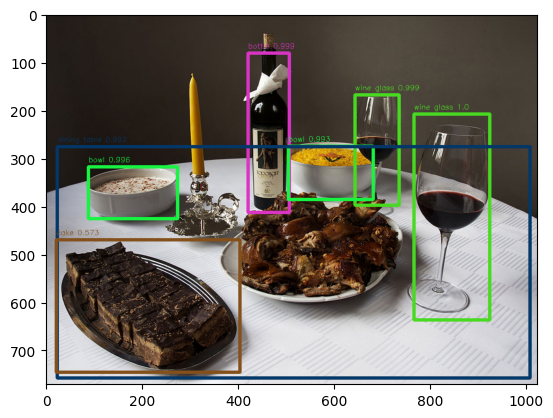

In [31]:
# CODE FOR QUESTION 14
img_yolo = img.copy()

for i in indices.flatten():
  x, y, w, h = boxes[i]
  class_name = class_names[i]
  confidence = confidences[i]
  color = colors[i]
  text = f'{class_name} {confidence:.3}'
  cv2.rectangle(img_yolo, (x, y), (x + w, y + h), color, 5)
  cv2.putText(
      img_yolo,
      text,
      (x, y - 10),
      cv2.FONT_HERSHEY_SIMPLEX,
      0.5,
      color)

plt.imshow(cv2.cvtColor(img_yolo, cv2.COLOR_BGR2RGB));